In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [5]:
# Fill missing numerical values
num_impute_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'BMI',
                   'Polio', 'Total expenditure',  'GDP',
                   ' thinness  1-19 years', ' thinness 5-9 years',
                   'Income composition of resources', 'Schooling']

# Add this line to check column names before the loop
print(df.columns)

for col in num_impute_cols:
    # Check if the column exists in the dataframe before proceeding
    if col in df.columns:
        if df[col].skew() < 1:  # Symmetrical distribution
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # Skewed distribution
            df[col].fillna(df[col].median(), inplace=True)
    else:
        print(f"Column '{col}' not found in DataFrame.")

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Column 'BMI' not found in DataFrame.


<ipython-input-5-df24d450c960>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-5-df24d450c960>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [6]:
# Group-based mean imputation for numerical columns
group_impute_cols = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 'Polio']
for col in group_impute_cols:
    df[col] = df.groupby('Status')[col].transform(lambda x: x.fillna(x.mean()))

In [7]:
# Fill categorical values with mode
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mode()[0])

In [8]:
from sklearn.impute import KNNImputer

# KNN Imputation for numerical features
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = df.select_dtypes(include=['float64', 'int64'])  # Apply to numerical columns only
df[df_knn.columns] = knn_imputer.fit_transform(df_knn)

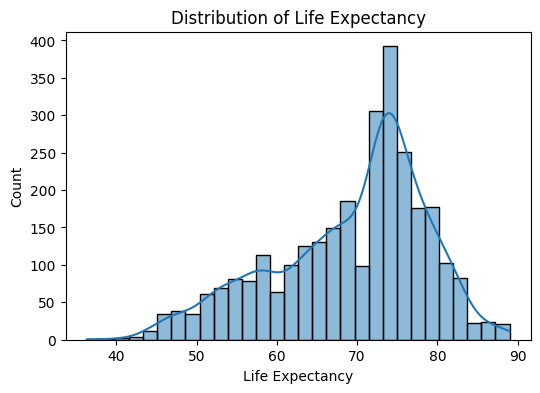

In [13]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(df['Life expectancy '], kde=True, bins=30)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.show()



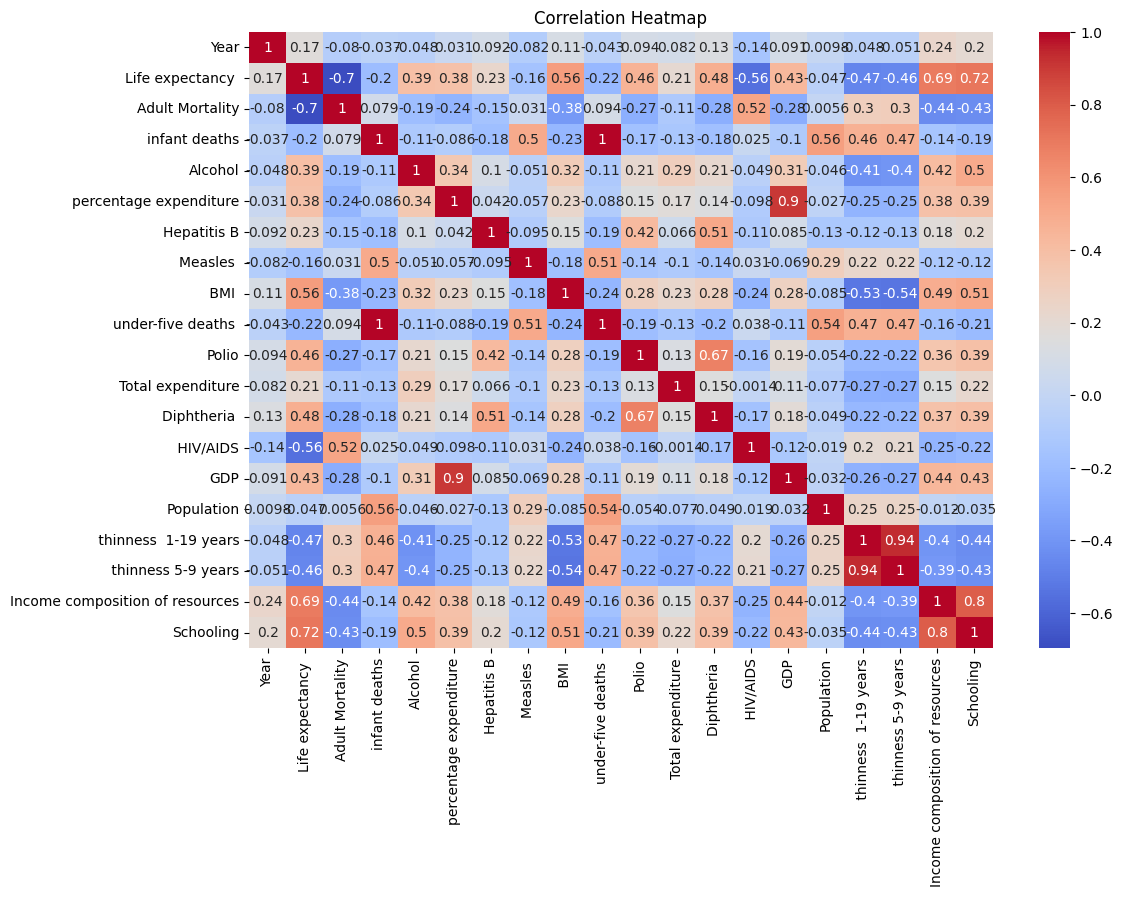

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df_cleaned=df

In [16]:
# Remove outliers using the IQR method for numerical columns only
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns

Q1 = df_cleaned[numerical_cols].quantile(0.25)
Q3 = df_cleaned[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~((df_cleaned[numerical_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Confirm the dataset after outlier removal
print(f"Dataset after outlier removal: {df_cleaned.shape}")

Dataset after outlier removal: (1104, 22)


In [17]:
# Split the data into independent (X) and dependent (y) variables
X = df_cleaned.drop('Life expectancy ', axis=1)
y = df_cleaned['Life expectancy ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create dummy variables for 'Country' and 'Status'
X = df_cleaned.drop('Life expectancy ', axis=1)
X = pd.get_dummies(X, columns=['Country', 'Status'], drop_first=True)  # drop_first avoids dummy variable trap

# Split the data into independent (X) and dependent (y) variables
y = df_cleaned['Life expectancy ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Predict
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 3.4808
  R² Score: 0.9087


      Actual  Predicted
830     69.9  70.369530
2760    74.5  74.251087
1066    75.0  72.021274
1361    63.9  64.659708
1511    72.8  73.813879


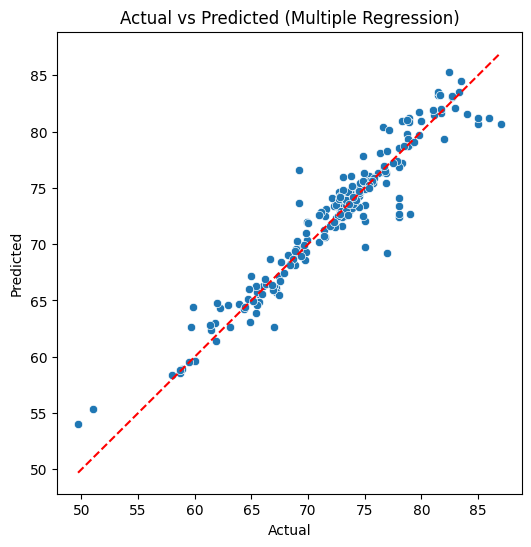

In [21]:
# Compare actual vs predicted values for multiple regression
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

# Plot actual vs predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=predictions['Actual'], y=predictions['Predicted'])
plt.plot([predictions['Actual'].min(), predictions['Actual'].max()],
         [predictions['Actual'].min(), predictions['Actual'].max()], color='red', linestyle='--')
plt.title("Actual vs Predicted (Multiple Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [24]:
# prompt: regression equation for multiple regression


# Print the regression equation for multiple linear regression
print("\nMultiple Linear Regression Equation:")
equation = "Life expectancy = {:.4f} ".format(model_multiple.intercept_)
for i, coef in enumerate(model_multiple.coef_):
    equation += "+ {:.4f} * {}".format(coef, X.columns[i])
equation


Multiple Linear Regression Equation:


"Life expectancy = -256.7419 + 0.1595 * Year+ 0.0011 * Adult Mortality+ 0.2259 * infant deaths+ -0.0568 * Alcohol+ -0.0001 * percentage expenditure+ -0.0255 * Hepatitis B+ 0.0001 * Measles + 0.0006 *  BMI + -0.2657 * under-five deaths + 0.0225 * Polio+ -0.0144 * Total expenditure+ 0.0322 * Diphtheria + -0.0174 *  HIV/AIDS+ -0.0000 * GDP+ -0.0000 * Population+ -0.0740 *  thinness  1-19 years+ 0.0751 *  thinness 5-9 years+ 19.8944 * Income composition of resources+ -0.1673 * Schooling+ 0.3427 * Country_Algeria+ -1.3654 * Country_Antigua and Barbuda+ -0.2010 * Country_Argentina+ -1.9295 * Country_Armenia+ 1.2888 * Country_Australia+ 0.2197 * Country_Austria+ -2.9807 * Country_Azerbaijan+ -2.2036 * Country_Bahamas+ -1.4809 * Country_Bahrain+ -0.0000 * Country_Barbados+ -5.1203 * Country_Belarus+ 1.3141 * Country_Belgium+ -5.6691 * Country_Belize+ -7.3173 * Country_Benin+ -4.1730 * Country_Bolivia (Plurinational State of)+ 1.0762 * Country_Bosnia and Herzegovina+ 1.2136 * Country_Brazil+ -1

Interpretation:
An R² score of 0.9087 means the model explains 90.87% of the variance in the target variable.
This indicates a strong fit, as the majority of the relationship between the predictors and the target variable is captured.

The MSE of 3.4808 suggests that the average squared deviation between actual and predicted values is relatively low, indicating accurate predictions.

The predictions are consistently close to actual values, with deviations under 4%.

The model appears to have strong predictive power, making it suitable for applications requiring precise forecasting.
Minor underestimation at higher values (e.g., index 1066) might suggest an area for further improvement.
